In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from scipy.signal import savgol_filter
import matplotlib.ticker as ticker

import healpy as hp
from scipy.stats import poisson

mpl.rcParams.update({
    'text.usetex': True,                  # Use LaTeX for text rendering
    'font.family': 'serif',               # Set font family to serif
    'font.serif': ['cmr10'],              # Use Computer Modern Roman for LaTeX math
    'axes.labelsize': 17,                 # Font size for axis labels
    'axes.linewidth': 1.5,                # Axis line thickness
    'xtick.labelsize': 12,                # Font size for x-tick labels
    'ytick.labelsize': 12,                # Font size for y-tick labels
    'legend.fontsize': 10,                # Font size for legend text
    'font.size': 14,
    'legend.frameon': False,              # Remove the box around the legend
    'axes.formatter.use_mathtext': True   # Use mathtext for labels
})

In [2]:
root_dir = './output_CNB'

eV = 1.602176487e-19
k_B = 1.3806504e-23
T_nu = 2.7255*0.71611

Nq_interp = 500

In [3]:
def read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes", output_density = "no"):
    
    q_size = len(q_ratio)
    q_max = np.max(q_ratio)
    pref = ((2 * np.pi)**3)/2 

    # Read background data
    with open(file_path, 'r') as file:
        line_count = 0
        all_columns_bg = []
        for line in file:
            line_count += 1
            if line_count <= 4:  # Skip the first four lines
                continue
            columns = line.split()
            if len(all_columns_bg) == 0:
                all_columns_bg = [[] for _ in range(len(columns))]
            elif len(all_columns_bg) != len(columns):
                diff = len(columns) - len(all_columns_bg)
                all_columns_bg.extend([] for _ in range(diff))

            for j, column_data in enumerate(columns):
                all_columns_bg[j].append(float(column_data))

    # Prepare f using background data
    if is_ncdm_decay_degenerate == "yes":
        lnf_all = [all_columns_bg[18 + q_size + i] for i in range(q_size)]
    else:
        lnf_all = [all_columns_bg[21 + q_size + i] for i in range(q_size)]
    lnf_s = [sublist[-1] for sublist in lnf_all]
    lnf_d = np.array(lnf_s, dtype=float)
    f = pref*np.exp(lnf_d)

    # Interpolate f
    q_int = np.linspace(q_max/Nq_interp, q_max, Nq_interp)
    interp_func = interp1d(q_ratio, f, kind='cubic', fill_value='extrapolate')
    f = interp_func(q_int)
    
    if output_density == "yes":
        if is_ncdm_decay_degenerate == "yes":
            n_nuL_0 = all_columns_bg[15 + q_size][-1]
            rho_nuL_0 = all_columns_bg[16 + q_size][-1]
        else:
            n_nuL_0 = all_columns_bg[18 + q_size][-1]
            rho_nuL_0 = all_columns_bg[19 + q_size][-1]  

    if output_density == "yes":
        return f, q_int, n_nuL_0, rho_nuL_0 
    else:
        return f, q_int

In [4]:
q_max = 15
q_int0 =  np.linspace(q_max/Nq_interp, q_max, Nq_interp)
f0 = (1./(np.exp(q_int0)+1.))

In [5]:
file_path = root_dir+'/testA2_g1000_mL0p03_background.dat'
q_ratio = np.array([0.428571,0.857143,1.28571,1.71429,2.14286,2.57143,3,3.42857,3.85714,4.28571,4.71429,5.14286,5.57143,6,6.42857,6.85714,7.28571,7.71429,8.14286,8.57143,9,9.42857,9.85714,10.2857,10.7143,11.1429,11.5714,12,12.4286,12.8571,13.2857,13.7143,14.1429,14.5714,15]) 
f1, q_int1 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "no")

file_path = root_dir+'/testA2_g300_mL0p03_background.dat'
q_ratio = np.array([0.75,1.5,2.25,3,3.75,4.5,5.25,6,6.75,7.5,8.25,9,9.75,10.5,11.25,12,12.75,13.5,14.25,15]) 
f2, q_int2 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "no")

file_path = root_dir+'/testA2_g100_mL0p03_background.dat'
q_ratio = np.array([0.75,1.5,2.25,3,3.75,4.5,5.25,6,6.75,7.5,8.25,9,9.75,10.5,11.25,12,12.75,13.5,14.25,15]) 
f3, q_int3 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "no")

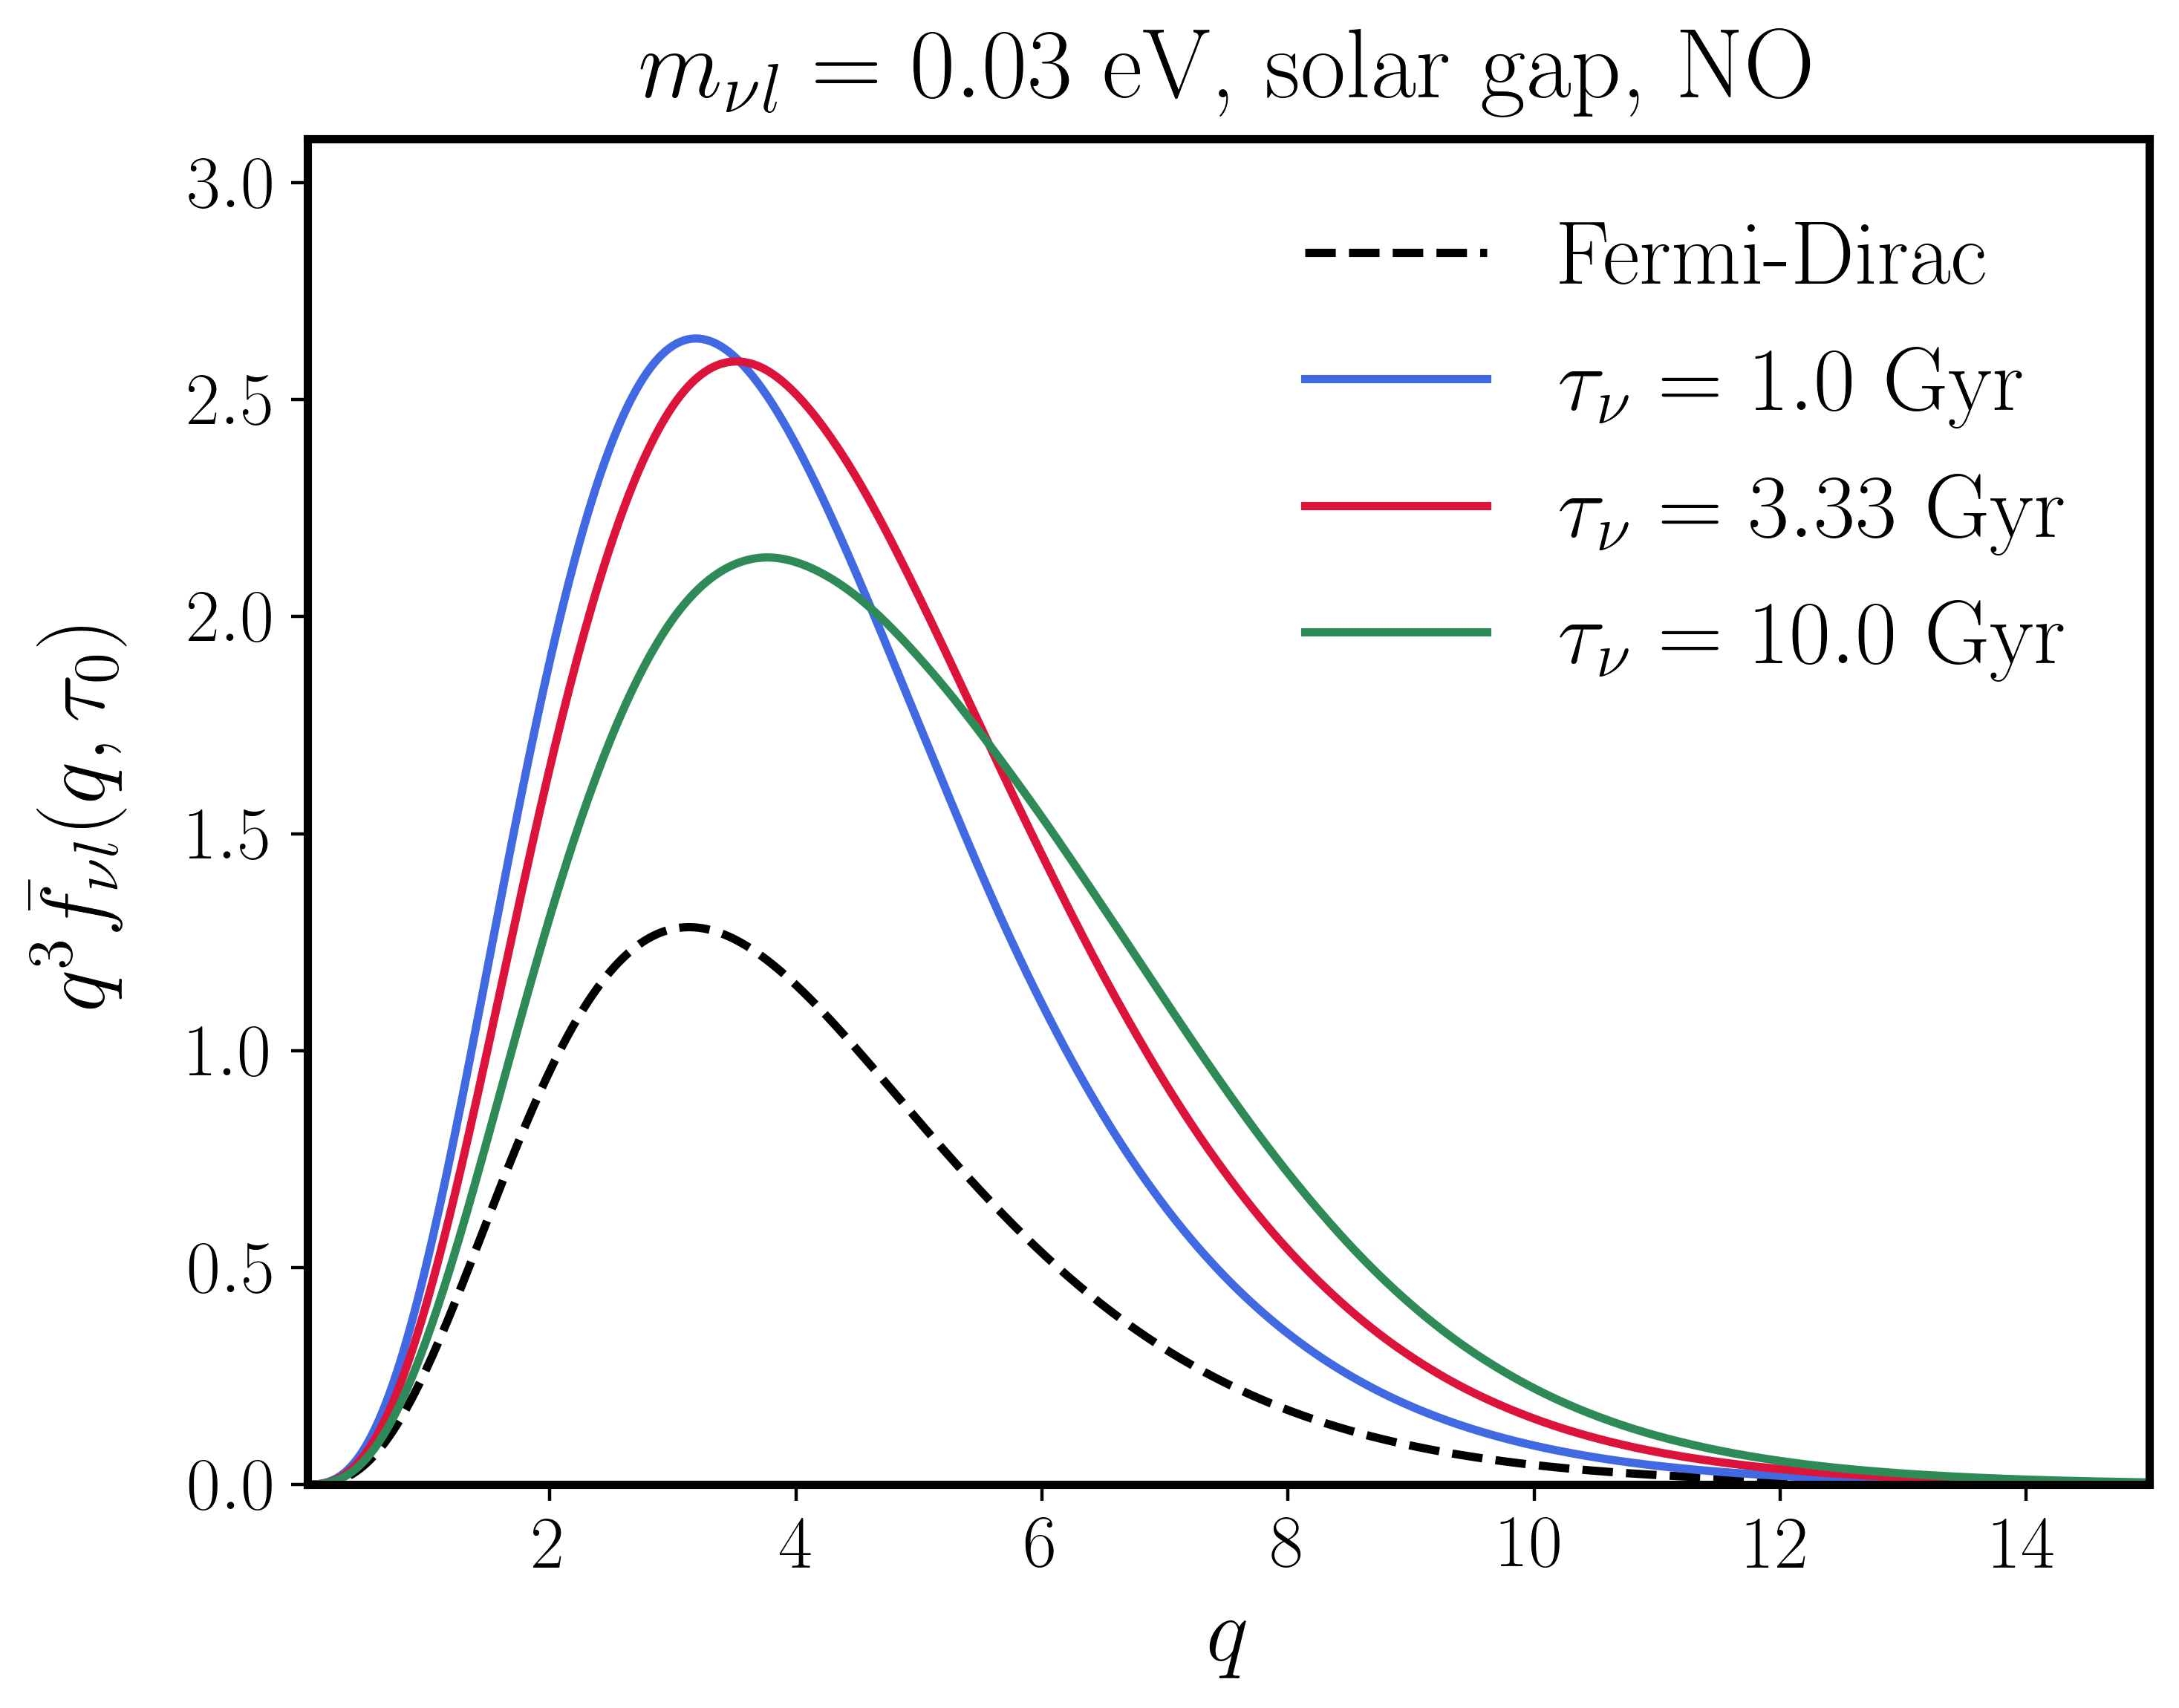

In [6]:
plt.figure(figsize=(8, 6), dpi=400)

power_q = 3
fontsize = 22
fontsize_title = 24
fontsize_tick = 18

plt.plot(q_int0,(q_int0**power_q)*f0, color = 'black',lw=2, ls = '--', label=r"Fermi-Dirac")
plt.plot(q_int1,(q_int1**power_q)*f1, color='royalblue',lw=2, label=r"$\tau_\nu = 1.0 \ \mathrm{Gyr}$")
plt.plot(q_int2,(q_int2**power_q)*f2, color='crimson',lw=2, label=r"$\tau_\nu = 3.33 \ \mathrm{Gyr}$")
plt.plot(q_int3,(q_int3**power_q)*f3, color='seagreen',lw=2, label=r"$\tau_\nu = 10.0 \ \mathrm{Gyr}$")

plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)
plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)

plt.xlim([q_int3[0],q_int3[-1]])
plt.ylim([0.0,3.1])

[x.set_linewidth(2.0) for x in plt.gca().spines.values()]

plt.title(r'$m_{\nu l} = 0.03$ eV, solar gap, NO',fontsize=fontsize_title,pad=10)
plt.legend(fontsize=fontsize,frameon=False,loc='upper right')
plt.xlabel(r'$q$', fontsize=fontsize)
plt.ylabel(r'$q^%d \bar{f}_{\nu l}(q, \tau_0)$'%power_q, fontsize=fontsize,labelpad=15)

plt.savefig('plots_residuals/PSD_A2.pdf')

plt.show()

In [7]:
file_path = root_dir+'/testA3_g1000_mL0p05_background.dat'
q_ratio = np.array([0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75,15]) 
f1, q_int1 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "no")

file_path = root_dir+'/testA3_g300_mL0p05_background.dat'
q_ratio = np.array([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15]) 
f2, q_int2 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "no")

file_path = root_dir+'/testA3_g100_mL0p05_background.dat'
q_ratio = np.array([0.75,1.5,2.25,3,3.75,4.5,5.25,6,6.75,7.5,8.25,9,9.75,10.5,11.25,12,12.75,13.5,14.25,15]) 
f3, q_int3 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "no")

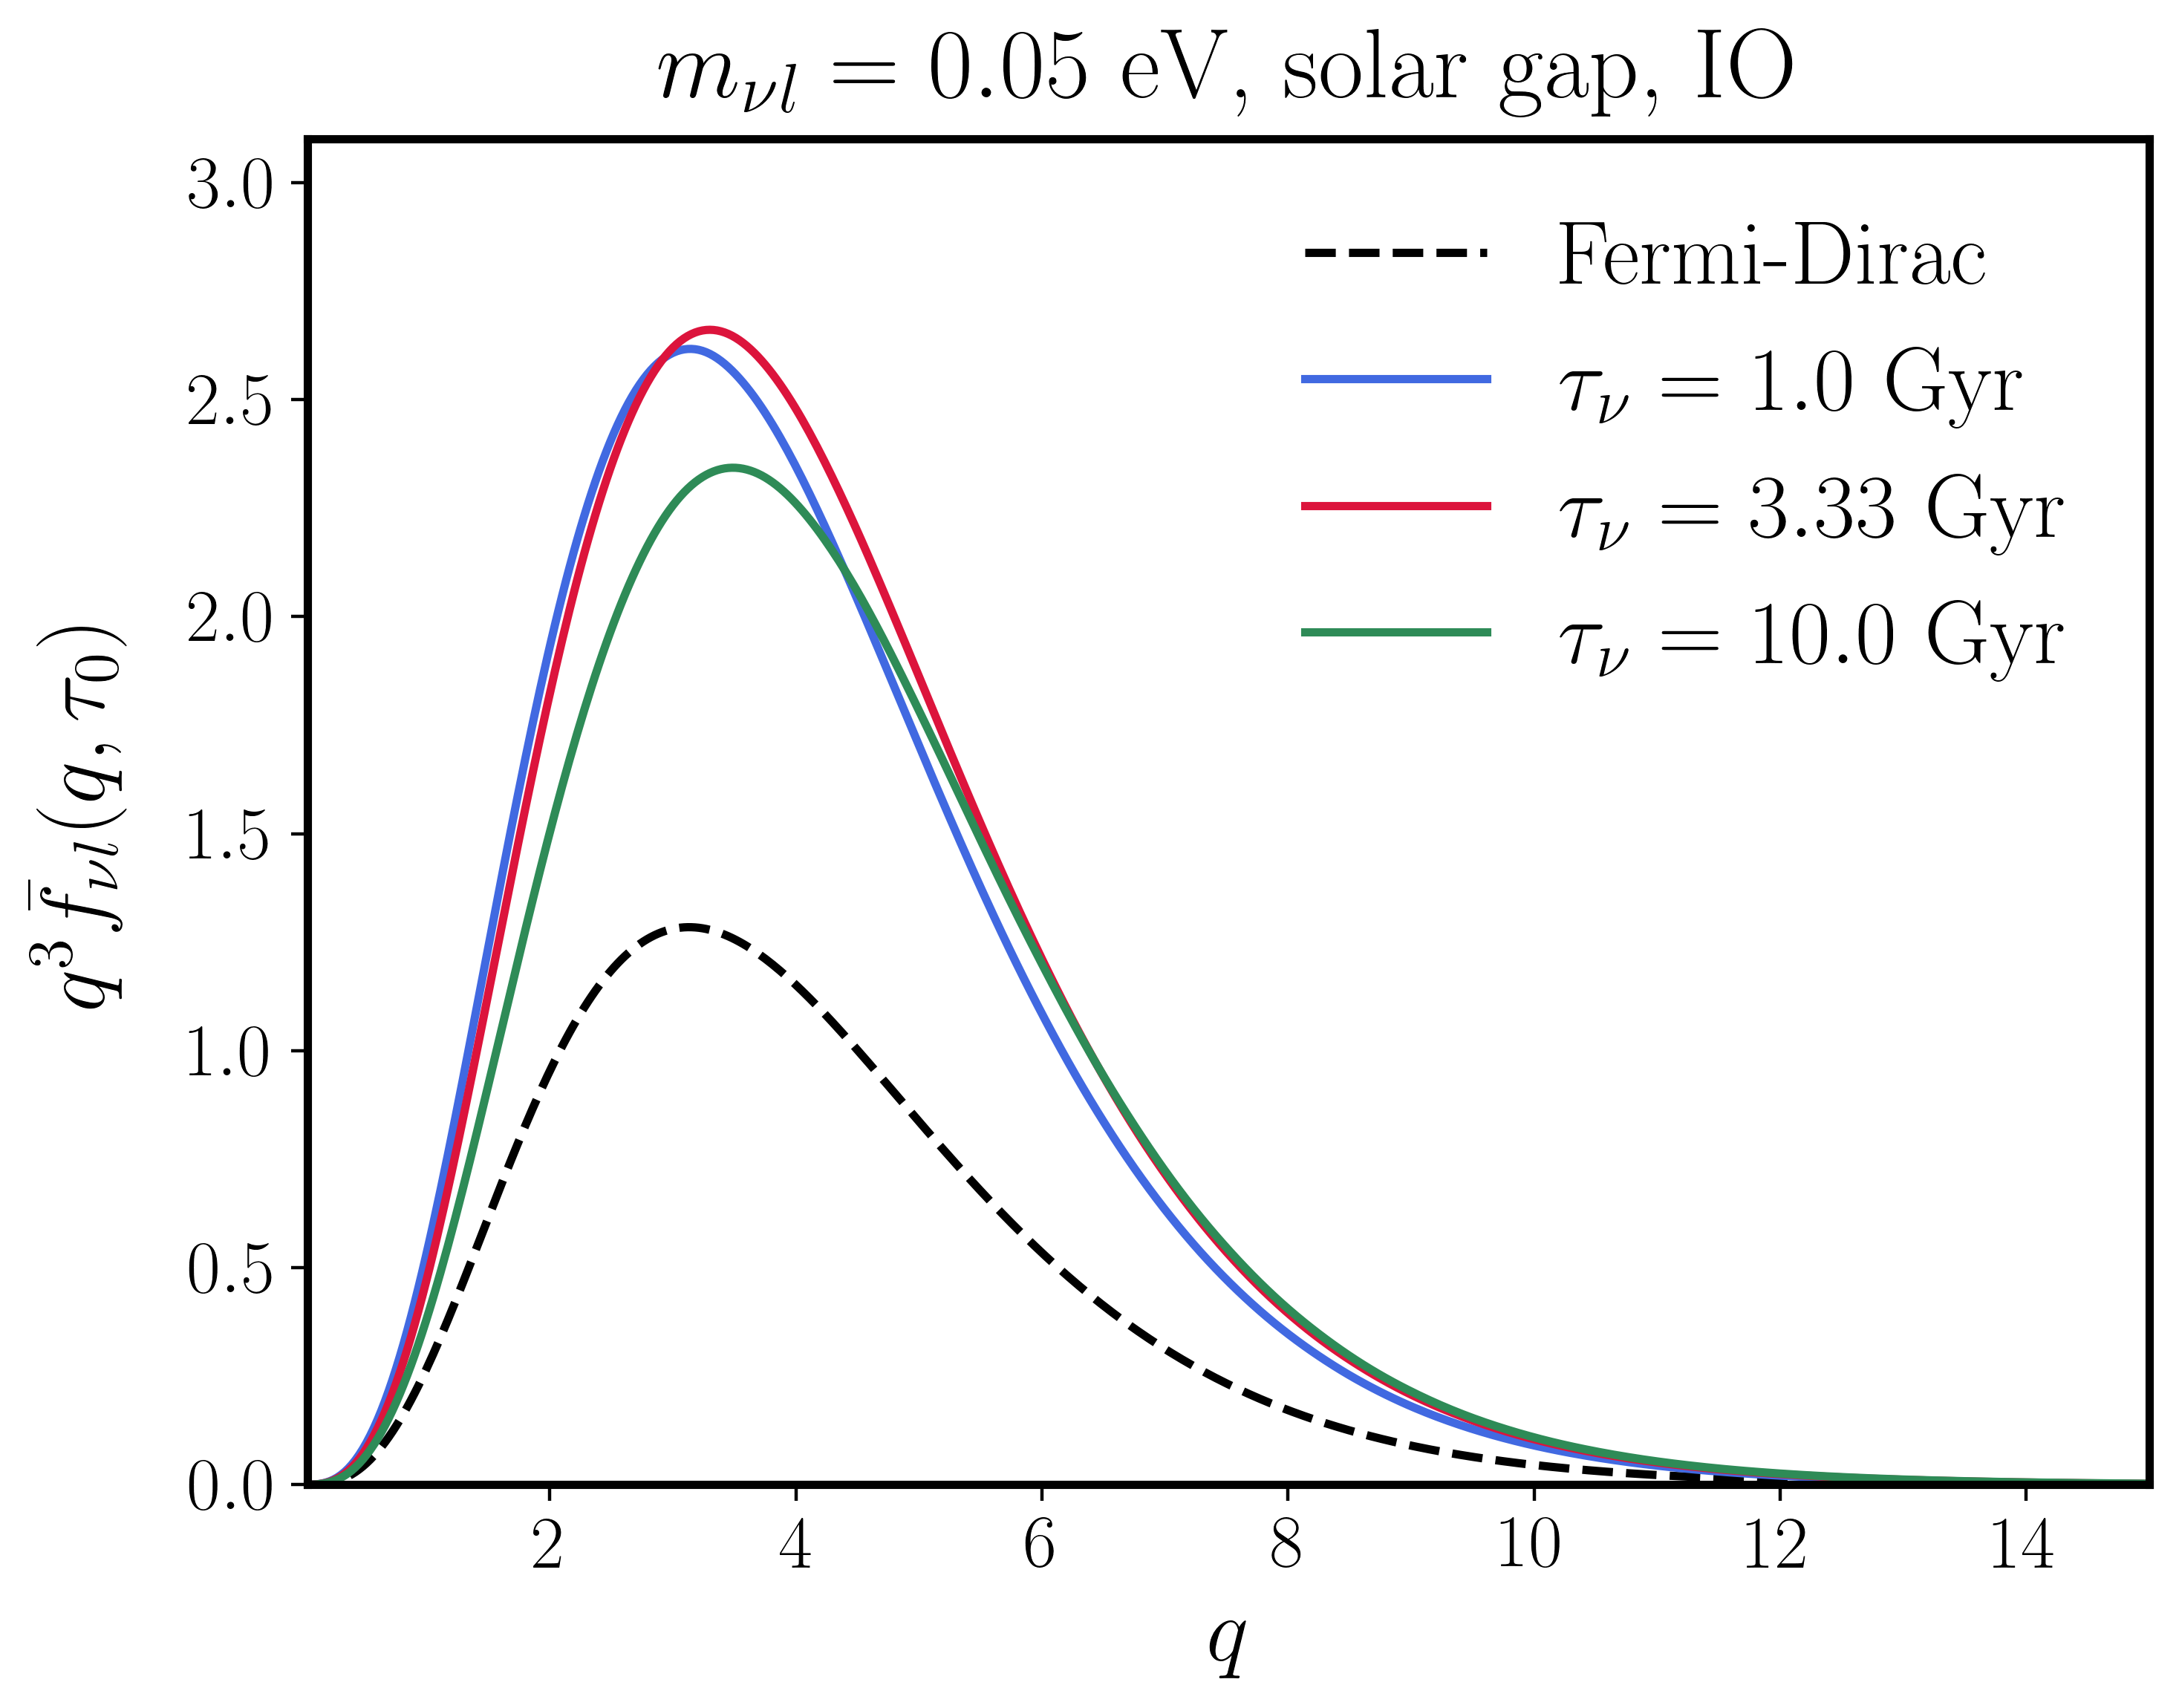

In [8]:
plt.figure(figsize=(8, 6), dpi=400)

power_q = 3
fontsize = 22
fontsize_title = 24
fontsize_tick = 18

plt.plot(q_int0,(q_int0**power_q)*f0, color = 'black',lw=2, ls = '--', label=r"Fermi-Dirac")
plt.plot(q_int1,(q_int1**power_q)*f1, color='royalblue',lw=2, label=r"$\tau_\nu = 1.0 \ \mathrm{Gyr}$")
plt.plot(q_int2,(q_int2**power_q)*f2, color='crimson',lw=2, label=r"$\tau_\nu = 3.33 \ \mathrm{Gyr}$")
plt.plot(q_int3,(q_int3**power_q)*f3, color='seagreen',lw=2, label=r"$\tau_\nu = 10.0 \ \mathrm{Gyr}$")

plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)
plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)

plt.xlim([q_int3[0],q_int3[-1]])
plt.ylim([0.0,3.1])

[x.set_linewidth(2.0) for x in plt.gca().spines.values()]

plt.title(r'$m_{\nu l} = 0.05$ eV, solar gap, IO',fontsize=fontsize_title,pad=10)
plt.legend(fontsize=fontsize,frameon=False,loc='upper right')
plt.xlabel(r'$q$', fontsize=fontsize)
plt.ylabel(r'$q^%d \bar{f}_{\nu l}(q, \tau_0)$'%power_q, fontsize=fontsize,labelpad=15)

plt.savefig('plots_residuals/PSD_A3.pdf')

plt.show()

In [9]:
file_path = root_dir+'/testB1_g1000_mL0p03_background.dat'
q_ratio = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]) 
f1, q_int1 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes")

file_path = root_dir+'/testB1_g500_mL0p03_background.dat'
q_ratio = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75]) 
f2, q_int2 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes")

file_path = root_dir+'/testB1_g250_mL0p03_background.dat'
q_ratio = np.array([0.901961,1.80392,2.70588,3.60784,4.5098,5.41176,6.31373,7.21569,8.11765,9.01961,9.92157,10.8235,11.7255,12.6275,13.5294,14.4314,15.3333,16.2353,17.1373,18.0392,18.9412,19.8431,20.7451,21.6471,22.549,23.451,24.3529,25.2549,26.1569,27.0588,27.9608,28.8627,29.7647,30.6667,31.5686,32.4706,33.3725,34.2745,35.1765,36.0784,36.9804,37.8824,38.7843,39.6863,40.5882,41.4902,42.3922,43.2941,44.1961,45.098,46,48.4706,50.9412,53.4118,55.8824,58.3529,60.8235,63.2941,65.7647,68.2353,70.7059,73.1765,75.6471,78.1176,80.5882,83.0588,85.5294,88,90.4706,92.9412,95.4118,97.8824,100.353,102.824,105.294,107.765,110.235,112.706,115.176,117.647,120.118,122.588,125.059,127.529,130]) 
f3, q_int3 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes")

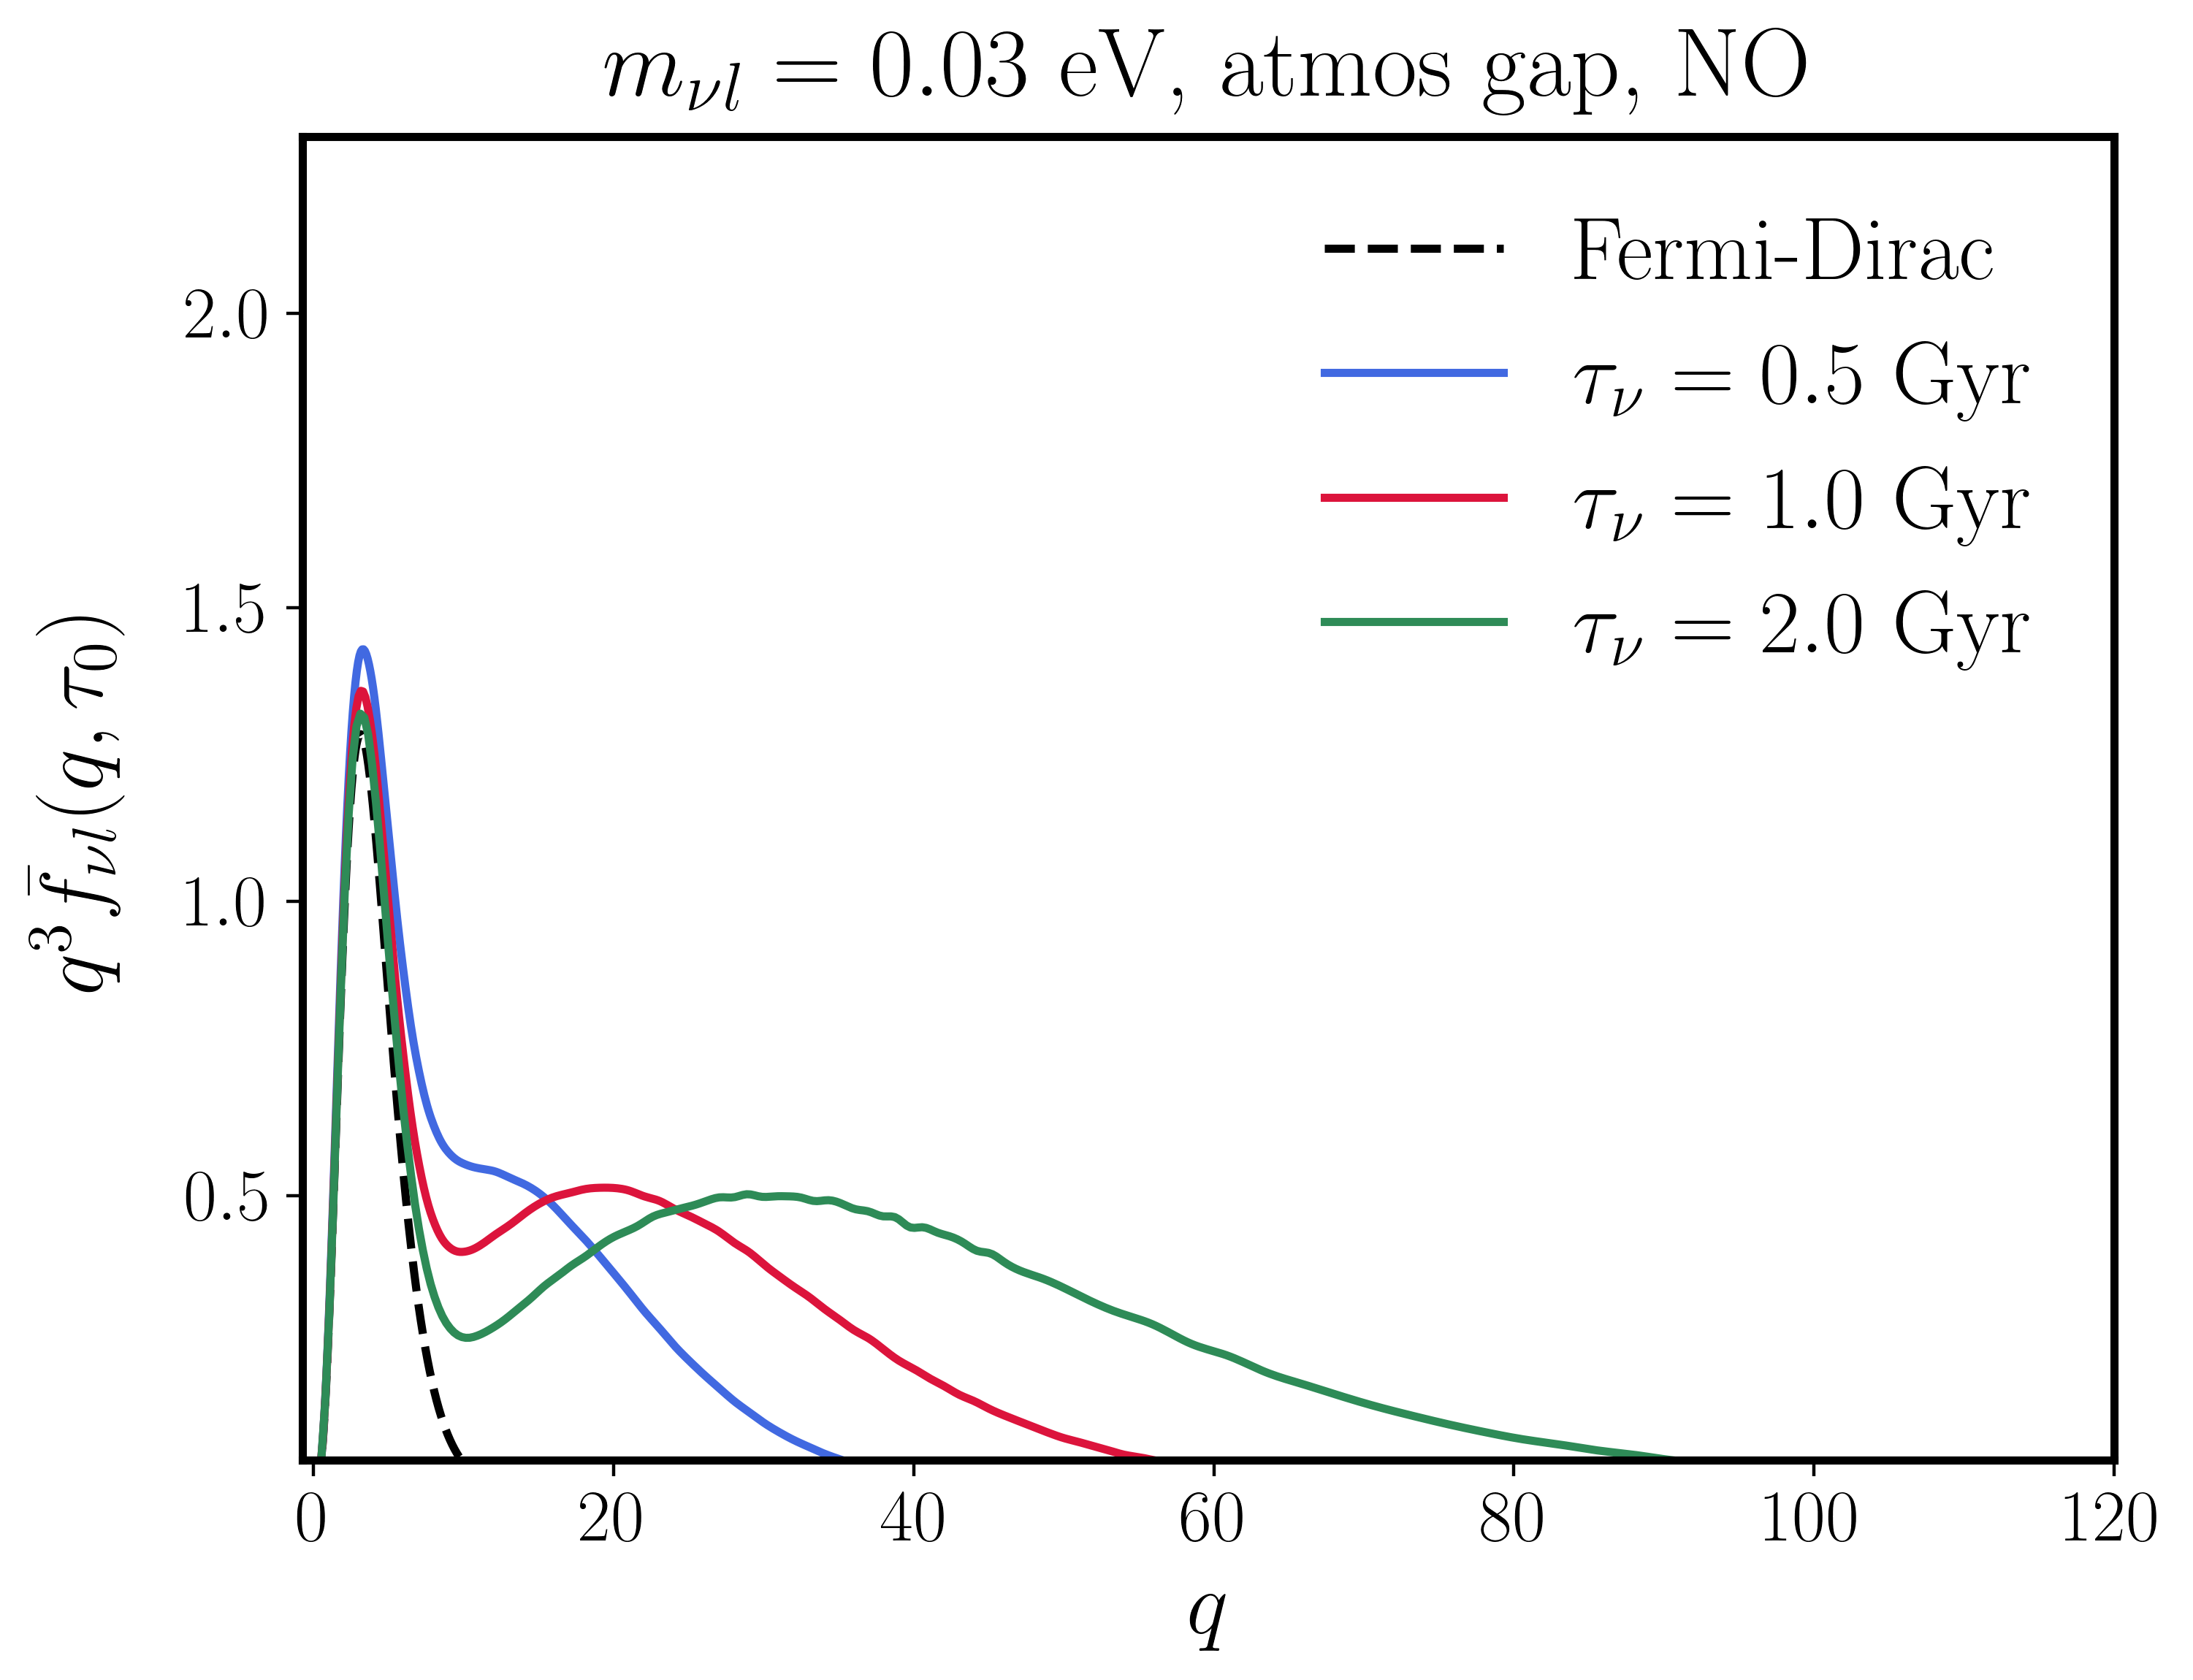

In [10]:
plt.figure(figsize=(8, 6), dpi=400)

power_q = 3
fontsize = 22
fontsize_title = 24
fontsize_tick = 18

plt.plot(q_int0,(q_int0**power_q)*f0, color = 'black',lw=2, ls = '--', label=r"Fermi-Dirac")
plt.plot(q_int1,(q_int1**power_q)*f1, color='royalblue',lw=2, label=r"$\tau_\nu = 0.5 \ \mathrm{Gyr}$")
plt.plot(q_int2,(q_int2**power_q)*f2, color='crimson',lw=2, label=r"$\tau_\nu = 1.0 \ \mathrm{Gyr}$")
plt.plot(q_int3,(q_int3**power_q)*f3, color='seagreen',lw=2, label=r"$\tau_\nu = 2.0 \ \mathrm{Gyr}$")

plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)
plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)

#plt.xlim([q_int3[0]-1,105])
#plt.ylim([0.01,1.55])
plt.ylim([0.05,2.3])
plt.xlim([q_int3[0]-1,120])


plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

[x.set_linewidth(2.0) for x in plt.gca().spines.values()]

plt.title(r'$m_{\nu l} = 0.03 $ eV, atmos gap, NO',fontsize=fontsize_title,pad=10)
plt.legend(fontsize=fontsize,frameon=False,loc='upper right')
plt.xlabel(r'$q$', fontsize=fontsize)
plt.ylabel(r'$q^%d \bar{f}_{\nu l}(q, \tau_0)$'%power_q, fontsize=fontsize,labelpad=15)

plt.savefig('plots_residuals/PSD_B1.pdf')

plt.show()

In [11]:
file_path = root_dir+'/testB2_g1000_mL0p02_background.dat'
q_ratio = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75]) 
f1, q_int1 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes")

file_path = root_dir+'/testB2_g500_mL0p02_background.dat'
q_ratio = np.array([0.958333,1.91667,2.875,3.83333,4.79167,5.75,6.70833,7.66667,8.625,9.58333,10.5417,11.5,12.4583,13.4167,14.375,15.3333,16.2917,17.25,18.2083,19.1667,20.125,21.0833,22.0417,23,23.9583,24.9167,25.875,26.8333,27.7917,28.75,29.7083,30.6667,31.625,32.5833,33.5417,34.5,35.4583,36.4167,37.375,38.3333,39.2917,40.25,41.2083,42.1667,43.125,44.0833,45.0417,46,48.625,51.25,53.875,56.5,59.125,61.75,64.375,67,69.625,72.25,74.875,77.5,80.125,82.75,85.375,88,90.625,93.25,95.875,98.5,101.125,103.75,106.375,109,111.625,114.25,116.875,119.5,122.125,124.75,127.375,130]) 
f2, q_int2 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes")

file_path = root_dir+'/testB2_g2000_mL0p02_background.dat'
q_ratio = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]) 
f3, q_int3 = read_files(file_path, q_ratio, is_ncdm_decay_degenerate = "yes")

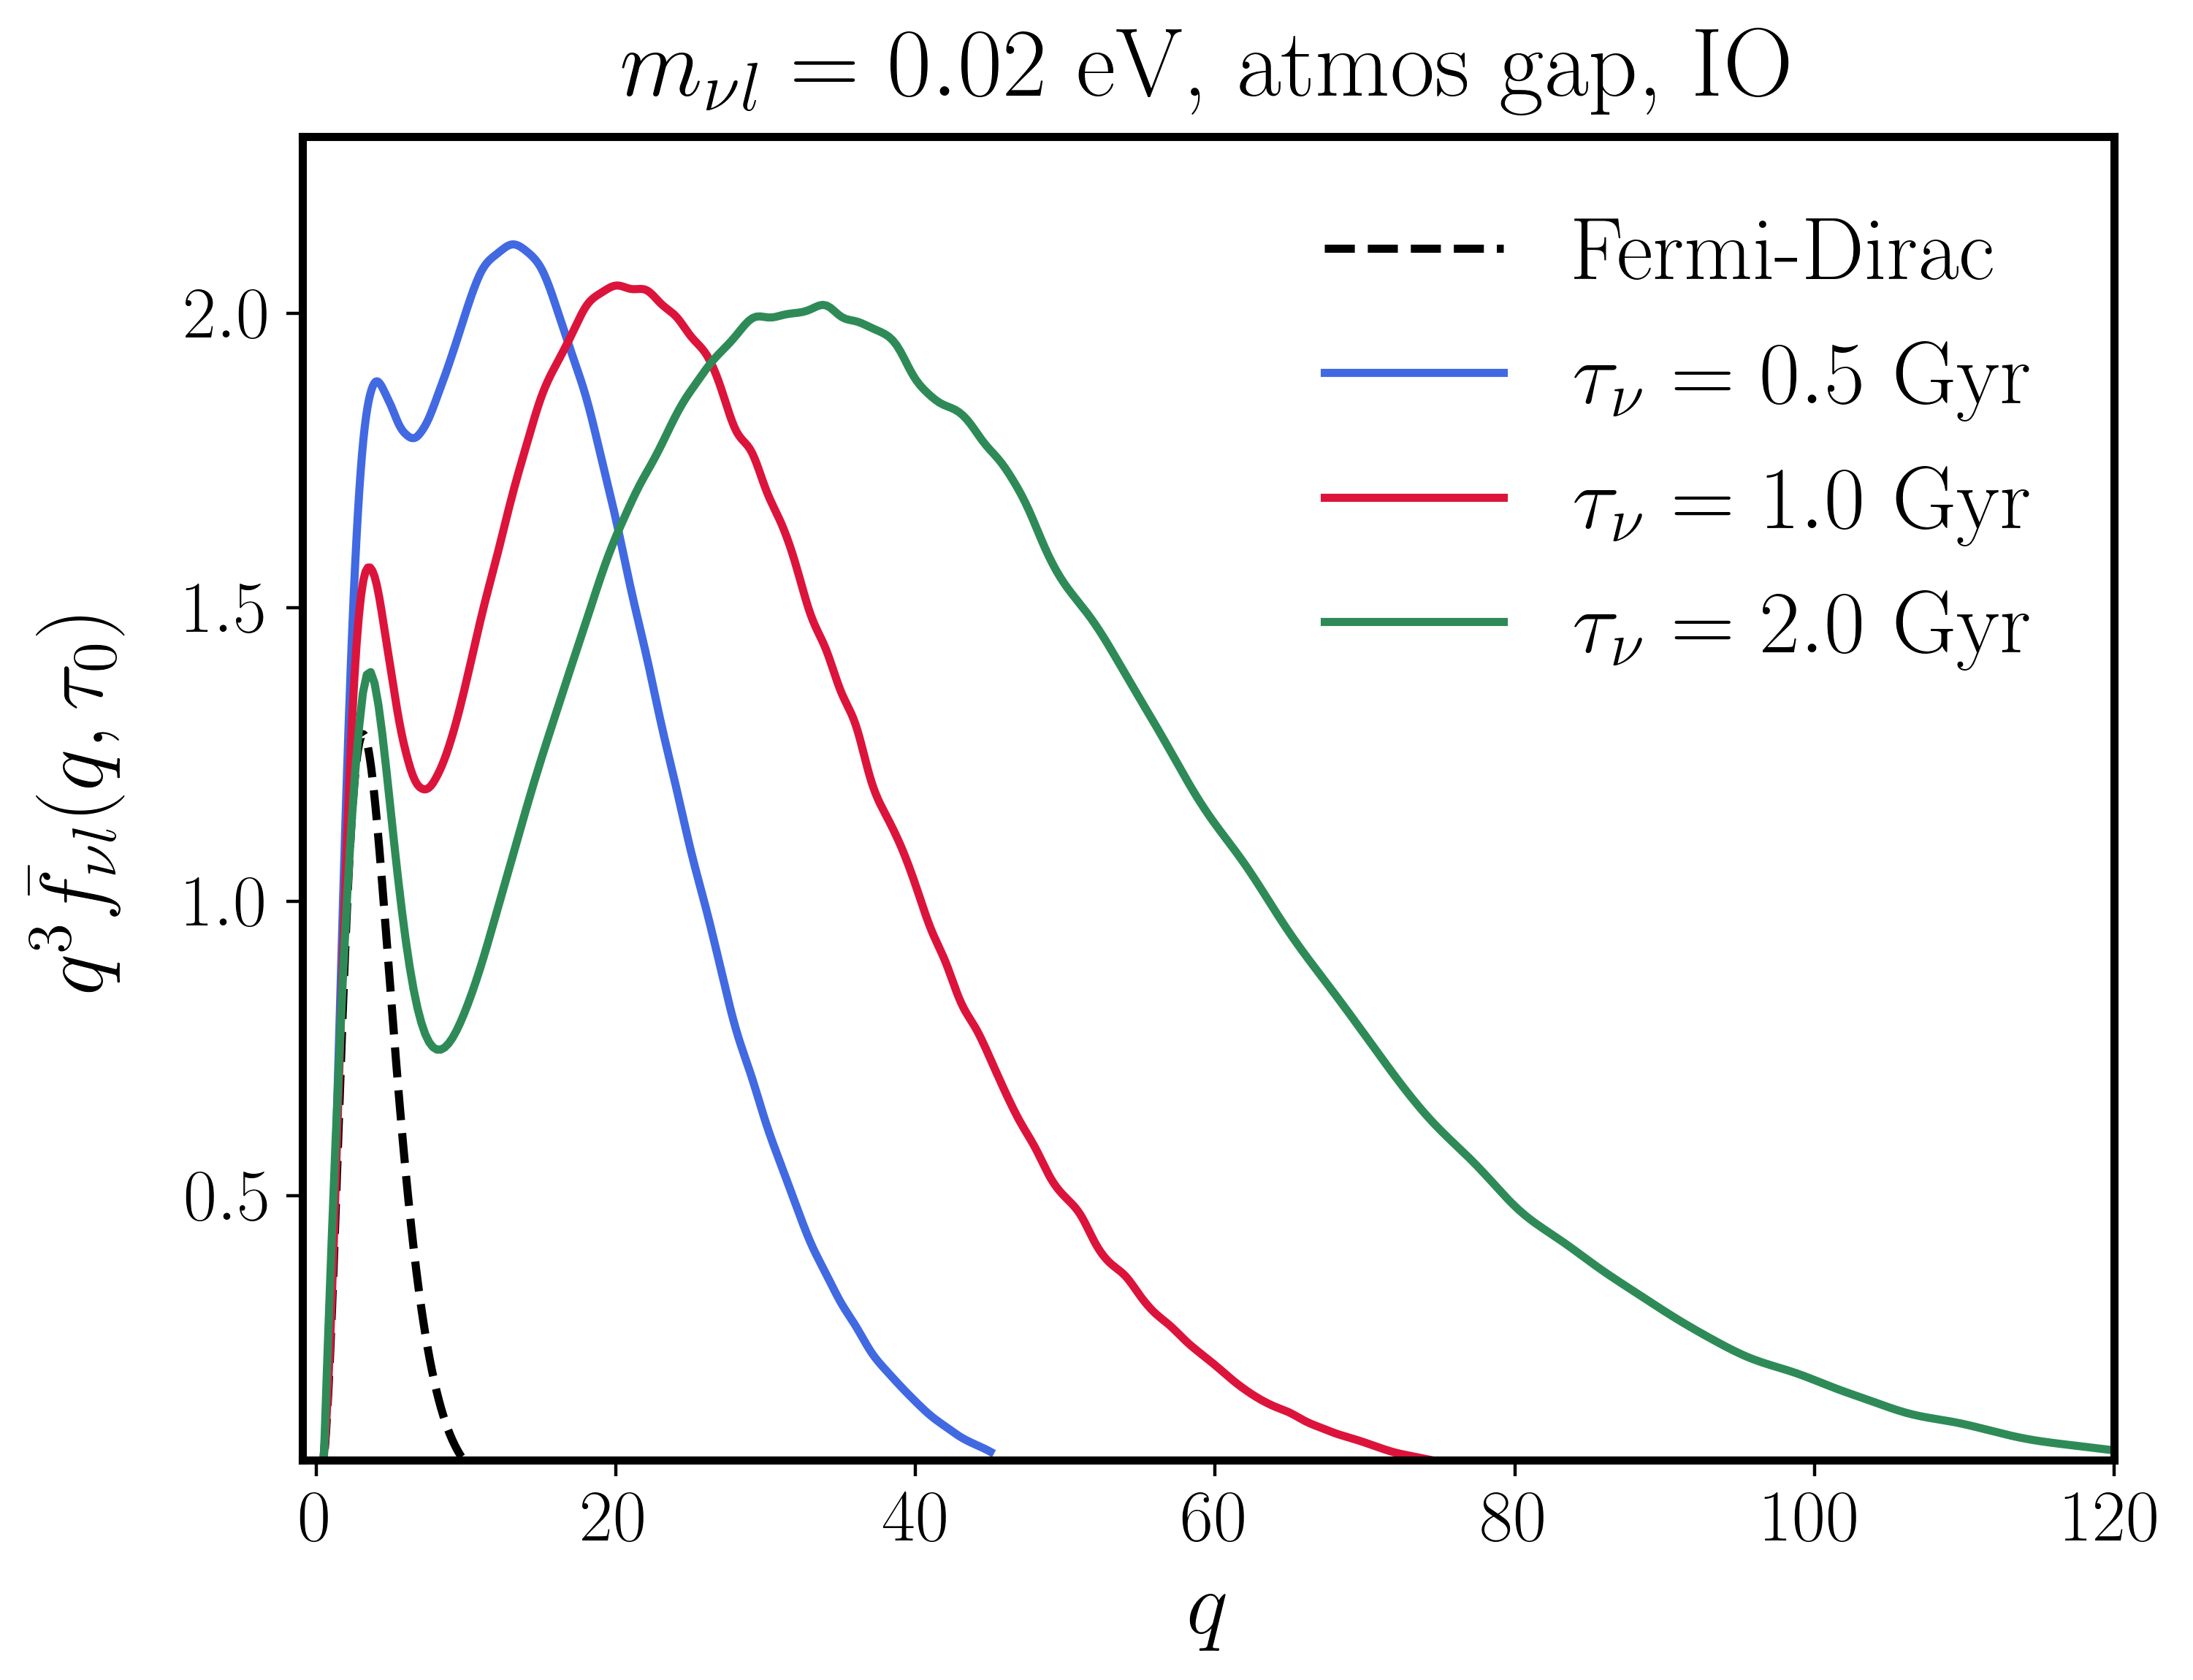

In [12]:
plt.figure(figsize=(8, 6), dpi=400)

power_q = 3
fontsize = 22
fontsize_title = 24
fontsize_tick = 18


plt.plot(q_int0,(q_int0**power_q)*f0, color = 'black' ,lw=2, ls = '--', label=r"Fermi-Dirac")
plt.plot(q_int3,(q_int3**power_q)*f3, color ='royalblue',lw=2, label=r"$\tau_\nu = 0.5 \ \mathrm{Gyr}$")
plt.plot(q_int1,(q_int1**power_q)*f1, color ='crimson'  ,lw=2, label=r"$\tau_\nu = 1.0 \ \mathrm{Gyr}$")
#plt.plot(q_int2,(q_int2**power_q)*f2, color ='seagreen' ,lw=2, label=r"$\tau_\nu = 2.0 \ \mathrm{Gyr}$")
plt.plot(q_int2,savgol_filter((q_int2**power_q)*f2, 21, 3), color ='seagreen' ,lw=2, label=r"$\tau_\nu = 2.0 \ \mathrm{Gyr}$")


plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)
plt.tick_params(axis='both', which='major',direction="out",labelsize=fontsize_tick,size=4)

plt.xlim([q_int3[0]-1,120])
plt.ylim([0.05,2.3])

plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

[x.set_linewidth(2.0) for x in plt.gca().spines.values()]

plt.title(r'$m_{\nu l} = 0.02$ eV, atmos gap, IO',fontsize=fontsize_title,pad=10)
plt.legend(fontsize=fontsize,frameon=False,loc='upper right')
plt.xlabel(r'$q$', fontsize=fontsize)
plt.ylabel(r'$q^%d \bar{f}_{\nu l}(q, \tau_0)$'%power_q, fontsize=fontsize,labelpad=15)

plt.savefig('plots_residuals/PSD_B2.pdf')

plt.show()